<a href="https://colab.research.google.com/github/vanislekahuna/Portfolio-Projects/blob/main/BrainStation_Kickstarter_Campaign_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KickStarter Board Game Campaign Analysis**


## **Introduction**
### **Stage 1 - Establishing the Business Question**


Through crowdfunding, one of the most viable ways to raise funding, find product-market fit and amass hype for a project. However, before we move forward, let's run through a quick breakdown of the crowdfunding model for those new to the term. [**Crowdfunding**]('https://en.wikipedia.org/wiki/Crowdfunding') is the practice of raising capital from the public towards a project, venture, or initiative and is now usually mediated through the internet. In exchange for their financial contribution, participants typically receive a tangible reward, such as a limited-version release of the product. We can liken this process to the funding model of Renaissance-era artists and scientists who appealed to their patrons for capital to continue advancing their respective fields. To date, the most popular platform for hosting crowdfunding has been [**KickStarter**]('https://www.kickstarter.com/about'), whose focus is more towards bringing exposure to creative projects.

As the leading crowdfunding platform, Kickstarter is the avenue that best aligns with our goals for funding a future board game product launch. The trouble is, navigating the intricacies of a Kickstarter's all-or-nothing crowdfunding model is tricky and will require optimal decision-making to succeed. With the all-or-nothing crowdfunding model, creators must post a monetary funding goal and reach it at a specified deadline. Else, they lose all the previous money that they, and their patrons, pledged to the project. But, on the other hand, there is no ceiling to the capital that a project can receive once it has surpassed the stated goal. Other additional perks of achieving their targets include the potential to go viral amongst their potential user base and access to early-stage venture of a successful product launch. With that said, Brainstation, our Data Science Consulting Team, is excited to work with you and help you successfully launch your board game to the masses!

As you've requested, we've focused our consulting engagement with you to help answer the three key questions you've so concisely developed about your campaign initiative:

1. *What is a realistic Kickstarter campaign goal (in dollars) should the company aim to raise?*
2. *How many backers will be needed to meet their goal?*
3. *How many backers can the company realistically expect, based on trends in their category?* (BrainStation, n.d.)

In addition, we were given a list and a description of all the unique features in the `campaign` table for us to reference:

- `ID`: unique project ID
- `name`: project name
- `sub_category_id`: what industry/category was the project in?
- `country_id`: id number associated to country of origin
- `currency_id`: what currency funding was given in?
- `launched`: date fundraising began
- `deadline`: when the target amount must be raised by
- `goal`: desired amount of funding
- `pledged`: how much was promised by the backer (whether or not the goal was achieved)
- `backers`: how many individuals contributed to the campaign?
- `outcome`: was the project funded or not? 

We've developed the following Data Science Consultation Report containing the data-driven insights, analysis, and recommendations you need to succeed in your Kickstarter campaign. In addition, our report will also focus on transparency by walking through our thought process leading up to the recommendation. Now that we've had a chance to address the key issues and our vision let's get started with our analysis.

### **Stage 2 - Data Collection**

Thanks to the data-mining efforts and the database that your team has provided, we focused our efforts on cleaning, querying, analyzing, and re-contextualizing the data to address the business question. First, we re-created the MySQL database containing data on previous Kickstarter campaigns with the [scipt]('https://drive.google.com/file/d/1nbHzU5nCbuoAmQzE0KkKgnJE6W04gpLy/view?usp=sharing') you provided. Then, for our convenience, [we wrote an additional SQL script]('https://drive.google.com/file/d/1ddCtL_23Wtc4bbL1oXyIH9v3-bh2QRac/view?usp=sharing') to combine all the related tables in the database into a CSV-formatted master table. Afterwards, we stored the table in Google Drive and accessed it using our Google Colab Notebook. Lastly, we manipulated the data using Python and SQL programming languages.

We've summarized our data collection process with the following steps:
1. Upgrading and uploading the necessary software libraries,
2. "Mount(ing)" our Google Drive,
3. Uploading the converted CSV file into Colab,
4. And using Pandas to read the converted CSV file into a DataFrame. One of the benefits of uploading the data this way was that Pandas automatically removed data entries (or rows) that did not align with the DataFrame's schema. In other words, we automatically removed rows that had more, or less, columns than the amount pre-constructed in the DataFrame. Only a few rows had this problem, so the data we removed did not significantly impact the results of our analysis.


In the following stage, we also established a SQL engine using the SQLAlchemy Library to continue running SQL queries throughout the Python notebook.

In [ ]:
#Step 1
!pip install --upgrade plotly

     |████████████████████████████████| 25.3 MB 67 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import pandas as pd
import sqlite3
from google.colab import drive
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import os
import sqlalchemy
import numpy as np
import seaborn as sns

In [ ]:
#@title

# Step 2
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title

# Step 3
path = '/content/drive/My Drive/BrainStation/kickstarter_mysql_export.csv'
os.path.exists(path)

True

In [ ]:
#@title

# Step 4
ks = pd.read_csv(path, delimiter=',', encoding='utf-8', error_bad_lines=False)
ks.head(1)

b'Skipping line 92: expected 20 fields, saw 31\nSkipping line 112: expected 20 fields, saw 21\nSkipping line 390: expected 20 fields, saw 21\nSkipping line 471: expected 20 fields, saw 31\nSkipping line 588: expected 20 fields, saw 31\nSkipping line 613: expected 20 fields, saw 31\nSkipping line 655: expected 20 fields, saw 31\nSkipping line 718: expected 20 fields, saw 31\nSkipping line 844: expected 20 fields, saw 31\nSkipping line 906: expected 20 fields, saw 21\n'


,id,name,sub_category_id,country_id,currency_id,launched,deadline,goal,pledged,backers,outcome,id.1,name.1,id.2,name.2,id.3,name.3,category_id,id.4,name.4
0,1,Ragdolls,23,2,2,2013-04-25 00:00:00,2013-05-25 00:00:00,15000.0,20.0,3,failed,2,US,2,USD,23,Webseries,2,2,Film & Video


## **Stage 3 - Data Cleaning**

Upon uploading the CSV file in Google Colab, we noticed that the lone SQL script we wrote in MySQL duplicated several of our `id` columns so we proceeded to delete the duplicates. We also had to rename several columns to accurately reflect the values within them.

In [ ]:
ks.rename(columns={"name.1":"country", 
                   "name.2": "currency", 
                   "name.3": "subcategory",
                   "name.4": "category"}, inplace=True)

ks.drop(['id.1', 'id.2', 'id.3', 'id.4'], axis=1, inplace=True)

### Accessing the SQL Querying Engine

Below is the code we mentioned at the end of Stage 2 to establish a connection to the SQL engine.

In [ ]:
engine = sqlalchemy.create_engine('sqlite://', echo=False)
ks.to_sql('ks_combined', con=engine)

In [ ]:
#@title

query = """
SELECT *
FROM ks_combined;
"""

result = engine.execute(query).fetchall()
result_df = pd.DataFrame(result, columns=['extra', 'id', 'name', 'sub_category_id', 'country_id', 'currency_id',
                                         'launched', 'deadline', 'goal', 'pledged', 'backers', 'outcome',
                                         'country', 'currency', 'subcategory', 'category_id', 'category'])

result_df.drop('extra', axis=1, inplace=True)

### Replacing acronyms with the country's actual name:

Another procedure that we thought was necessary was to replace the acronyms representing a country with it's actual name. The acronyms were confusing to understand at times so by replacing them with their names, we removed any possible confusion or ambiguity for later on when we start building data visualizations. 

In [ ]:
#@title

country_acronym_replacements = {
    'US':'United States',
    'AT': 'Austria',
    'GB': 'Great Britain',
    'DE': 'Germany',
    'AU': 'Australia',
    'CA': 'Canada',
    'IT': 'Italy',
    'CH': 'Switzerland',
    'SG': 'Singapore',
    'FR': 'France',
    'NZ': 'New Zealand',
    'NL': 'Netherlands',
    'ES': 'Spain',
    'SE': 'Sweeden',
    'BE': 'Belgium',
    'IE': 'Ireland',
    'DK': 'Denmark',
    'NO': 'Norway',
    'HK': 'Hong Kong',
    'MX': 'Mexico'
}

### Converting the various currencies into Canadian Dollar amount

The last piece about the dataset that needed cleaning was the various `currency` that denoted the funding in the `pledged` column. It would not be easy to compare the financing for different projects if they're all represented in foreign currencies. Our solution, therefore, was to standardize the denominations by converting them to the equivalent of Canadian Dollars (CAD) and storing them in the `pledged_CAD` column. The [currency rates]('https://www.webull.com/quote/fx-gbpcad') used for these conversions reflect those of Tuesday, Nov 16th, 2021.

In [ ]:
currency_conversion_query = """
SELECT name,
  goal,
  (julianday(deadline)-julianday(launched)) AS total_campaign_days,  
  pledged,
  CASE currency
WHEN 'USD' THEN ROUND(pledged * 1.2561, 2)
WHEN 'GBP' THEN ROUND(pledged * 1.6875, 2)
WHEN 'EUR' THEN ROUND(pledged * 1.4204, 2)
WHEN 'SEK' THEN ROUND(pledged * 0.1410, 2)
WHEN 'HKD' THEN ROUND(pledged * 0.16122, 2)
WHEN 'AUD' THEN ROUND(pledged * 0.9164, 2)
WHEN 'MXN' THEN ROUND(pledged * 0.0604, 2)
WHEN 'NZD' THEN ROUND(pledged * 0.8802, 2)
WHEN 'DKK' THEN ROUND(pledged * 0.1908, 2)
WHEN 'NOK' THEN ROUND(pledged * 0.1434, 2)
WHEN 'SGD' THEN ROUND(pledged * 0.9246, 2)
WHEN 'CHF' THEN ROUND(pledged * 1.3482, 2)
ELSE pledged
END AS pledged_CAD,
  backers, 
  outcome, 
  country, 
  currency, 
  subcategory, 
  category
FROM ks_combined;
"""
currency_conversion = engine.execute(currency_conversion_query).fetchall()
clean_df = pd.DataFrame(currency_conversion, columns=['name', 'goal', 'total_campaign_days', 'pledged', 'pledged_CAD', 'backers', 'outcome', 'country', 'currency', 'subcategory', 'category'])
clean_df['country'].replace(country_acronym_replacements, inplace=True)
clean_df.tail(2)

,name,goal,total_campaign_days,pledged,pledged_CAD,backers,outcome,country,currency,subcategory,category
981,Paria Exchange at Dave's Leicester Comedy Fest...,223.65,30.0,342.93,578.69,17,successful,Great Britain,GBP,Plays,Theater
982,Udgivelse: Månen og jeg,1198.29,40.0,1250.71,238.64,28,successful,Denmark,DKK,Music,Music


## **Stage 4 - Preliminary Data Analysis**

Now the fun part, analyzing the dataset for insights that can significantly drive the Kickstarter campaign forward. Since our goal is to attain funding for our board game, it would be helpful to survey the competitive landscape we'll compete with alongside other fascinating projects.

There are three main metrics with which we'll use to measure campaign success:

1. The stated `outcome` of the campaign;
2. The dollar amount `pledged_CAD` by patrons, denoted and standardized by Canadian Dollar amount;
3. And the number of `backers` backing the project.

These three metrics will appear continuously throughout our data visualizations.

Another critical point to understand here is Kickstarter's classifications to categorize the various projects on the platform. For example, Kickstarter classifies board game projects within the "Games" category and the "Tabletop Games" subcategory.

Our first order of business is to determine how much attention "Tabletop Games" gets amongst funders compared to other subcategories. For example, it typically wouldn't be productive if funders ignore board games for other subcategories, such as photography or video games.
To explore the differences in funding across subcategories, we developed a treemap to visualize and better understand the competitive landscape. In the treemap, we also distinguished subcategories by their campaign outcomes to understand how capital circulates among projects that succeed and those that fail.

In [ ]:
#@title
# Are the goals for dollars raised significantly different between campaigns that are successful and unsuccessful?

outcome_difference = """
SELECT 
  name,
  category,
  subcategory,
  goal, 
  pledged, 
  currency,
CASE currency
WHEN 'USD' THEN ROUND(pledged * 1.2561, 2)
WHEN 'GBP' THEN ROUND(pledged * 1.6875, 2)
WHEN 'EUR' THEN ROUND(pledged * 1.4204, 2)
WHEN 'SEK' THEN ROUND(pledged * 0.1410, 2)
WHEN 'HKD' THEN ROUND(pledged * 0.16122, 2)
WHEN 'AUD' THEN ROUND(pledged * 0.9164, 2)
WHEN 'MXN' THEN ROUND(pledged * 0.0604, 2)
WHEN 'NZD' THEN ROUND(pledged * 0.8802, 2)
WHEN 'DKK' THEN ROUND(pledged * 0.1908, 2)
WHEN 'NOK' THEN ROUND(pledged * 0.1434, 2)
WHEN 'SGD' THEN ROUND(pledged * 0.9246, 2)
WHEN 'CHF' THEN ROUND(pledged * 1.3482, 2)
ELSE pledged
END AS pledged_CAD,
  backers, 
  outcome, 
  country 
FROM ks_combined
WHERE outcome == 'successful' OR outcome=='failed';
"""
outcome_query = engine.execute(outcome_difference).fetchall()
outcome_df = pd.DataFrame(outcome_query, columns=['name', 'category', 'subcategory', 'goal', 'pledged', 'currency', 'pledged_CAD', 'backers', 'outcome', 'country'])
successes = outcome_df[outcome_df['outcome'] == 'successful']
failures = outcome_df[outcome_df['outcome'] == 'failed']

In [ ]:
outcome_breakdown = px.treemap(outcome_df, 
                          path=[px.Constant('category'), 'outcome', 'subcategory'],
                          values='pledged_CAD',
                          color='outcome',
                          color_discrete_sequence=['red', 'green', 'teal'],
                          title='Funding Outcome Tree'
                          )
outcome_breakdown.show()

Although our dataset didn't have many features, as an exercise, we also constructed a correlation heatmap to explore any relationships between the columns. Predictably, there was a very high correlation between the number of backers and the amount pledged. On the flip side, there was almost no correlation between a campaign's length with any other feature. There was also a slight negative correlation between funding goals and the other 3 features.

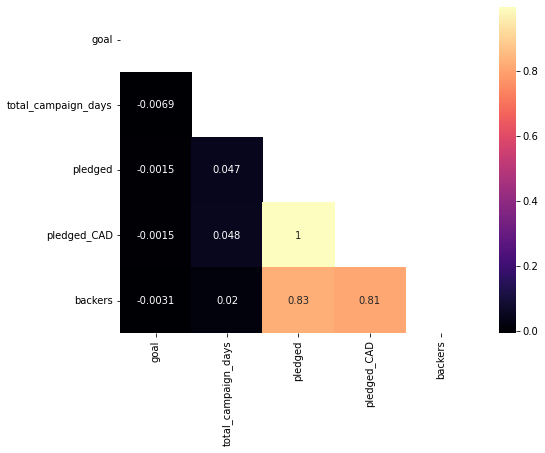

In [ ]:
#@title

# Creating a Pandas correlation map
corr = clean_df.corr()

# Setting up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(8, 6))

# Generating a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap
sns.heatmap(corr, annot=True, cmap='magma', mask=mask)

### Breaking down capital allocations and backer numbers amongst project subcategories

We found that product design, hardware, and documentaries were the top 3 subcategories that received the most funding. Tabletop games were in 4th place, collectively receiving about $350 K of the financing for the entire subcategory amongst projects that succeeded. This is good. This signals that board games that succeed in their funding goals receive an appropriate amount of attention from patrons. However, as a subcategory, it only captures 4% of the total allotment towards successful projects when compared to the leading subcategory, product design, which captures 31% of the funding.

If we look at projects that failed in their campaign goals, about $42 K went towards tabletop games that failed, representing about 4% of the total amount allocated towards projects that failed. Respectively, dance, crafts, and journalism were the three categories that earned the least funding.

What's astounding is that this dataset represents campaign data dating from 2009 to 2017. During that period, projects listed in the ceramics, conceptual art, gaming hardware, jewelry, movie theatres, music videos, video art, wearables, and young adults subcategories received zero funding. Based on these figures, we can infer two things. Either users on the platform simply don't value these types of projects, OR there was an error in Kickstarter's data collection processes. My hunch is the latter because a quick Google search of one of the "movie theatre" project reveals that there was indeed backers who funded projects in this subcategory. A campaign to [restore an old American movie theatre Vassar, Michigan]('https://www.kickstarter.com/projects/70967183/become-a-movie-hero?ref=discovery&term=movie%20theaters'), is the example I found representing this anomaly.



In [ ]:
#@title
# What are the top/bottom 3 categories that have raised the most money? 

money_categories = """
SELECT category, SUM(pledged) AS total_raised, SUM(
  CASE currency
  WHEN 'USD' THEN ROUND(pledged * 1.2561, 2)
  WHEN 'GBP' THEN ROUND(pledged * 1.6875, 2)
  WHEN 'EUR' THEN ROUND(pledged * 1.4204, 2)
  WHEN 'SEK' THEN ROUND(pledged * 0.1410, 2)
  WHEN 'HKD' THEN ROUND(pledged * 0.16122, 2)
  WHEN 'AUD' THEN ROUND(pledged * 0.9164, 2)
  WHEN 'MXN' THEN ROUND(pledged * 0.0604, 2)
  WHEN 'NZD' THEN ROUND(pledged * 0.8802, 2)
  WHEN 'DKK' THEN ROUND(pledged * 0.1908, 2)
  WHEN 'NOK' THEN ROUND(pledged * 0.1434, 2)
  WHEN 'SGD' THEN ROUND(pledged * 0.9246, 2)
  WHEN 'CHF' THEN ROUND(pledged * 1.3482, 2)
  ELSE pledged
  END
) AS total_raised_CAD
FROM ks_combined
GROUP BY category
ORDER BY total_raised_CAD DESC;
"""

money_category = engine.execute(money_categories).fetchall()
moneycats_df = pd.DataFrame(money_category, columns=['category', 'total_raised', 'total_raised_CAD'])
print(moneycats_df.head(3), '\n')
moneycats_df.tail(3)

     category  total_raised  total_raised_CAD
0      Design    2160275.66        2764317.65
1  Technology    1414466.78        1814114.90
2       Games     850050.89        1087996.88 



,category,total_raised,total_raised_CAD
12,Journalism,77427.13,97457.53
13,Crafts,35573.79,45273.49
14,Dance,34407.65,43219.45


In [ ]:
#@title
# What are the top/bottom 3 subcategories that have raised the most money?

money_subcategories = """
SELECT subcategory, SUM(pledged) AS total_raised, SUM(
  CASE currency
  WHEN 'USD' THEN ROUND(pledged * 1.2561, 2)
  WHEN 'GBP' THEN ROUND(pledged * 1.6875, 2)
  WHEN 'EUR' THEN ROUND(pledged * 1.4204, 2)
  WHEN 'SEK' THEN ROUND(pledged * 0.1410, 2)
  WHEN 'HKD' THEN ROUND(pledged * 0.16122, 2)
  WHEN 'AUD' THEN ROUND(pledged * 0.9164, 2)
  WHEN 'MXN' THEN ROUND(pledged * 0.0604, 2)
  WHEN 'NZD' THEN ROUND(pledged * 0.8802, 2)
  WHEN 'DKK' THEN ROUND(pledged * 0.1908, 2)
  WHEN 'NOK' THEN ROUND(pledged * 0.1434, 2)
  WHEN 'SGD' THEN ROUND(pledged * 0.9246, 2)
  WHEN 'CHF' THEN ROUND(pledged * 1.3482, 2)
  ELSE pledged
  END
) AS total_raised_CAD,
SUM(backers) AS total_backers
FROM ks_combined
GROUP BY subcategory
ORDER BY total_raised_CAD DESC;
"""

money_subcategory = engine.execute(money_subcategories).fetchall()
moneysubcats_df = pd.DataFrame(money_subcategory, columns=['subcategory', 'total_raised', 'total_raised_CAD', 'total_backers'])
print(moneysubcats_df.head(5), '\n')
moneysubcats_df[moneysubcats_df['total_raised'] == 0]

      subcategory  total_raised  total_raised_CAD  total_backers
0  Product Design    2094870.97        2683433.08          20910
1        Hardware    1097373.38        1407756.25           8949
2     Video Games     451468.70         567290.54           6353
3     Documentary     304414.68         447562.10           4520
4  Tabletop Games     312200.53         404688.55           7981 



,subcategory,total_raised,total_raised_CAD,total_backers
115,Ceramics,0.0,0.0,0
116,Conceptual Art,0.0,0.0,0
117,Gaming Hardware,0.0,0.0,0
118,Jewelry,0.0,0.0,0
119,Movie Theaters,0.0,0.0,0
120,Music Videos,0.0,0.0,0
121,Video Art,0.0,0.0,0
122,Wearables,0.0,0.0,0
123,Young Adult,0.0,0.0,0


In [ ]:
#@title

outcome_breakdown = px.treemap(outcome_df, 
                          path=[px.Constant('country'), 'outcome', 'subcategory'],
                          values='backers',
                          color='outcome',
                          color_discrete_sequence=['gold', 'teal', 'lavender'],
                          title='Backer Tree'
                          )
outcome_breakdown.show()

Since we love treemaps so much, we couldn't help but construct another one to look for trends amongst the number of backers rather than capital. Again, the results were similar to the previous graph. The only significant difference was that "Tabletop Games" were now in 3rd place with 6,860 total people backing projects, up from 4th in total funding. With these results, we can infer that more people gravitated towards board game projects but contributed less individually.

In [ ]:
#@title
# What are the top/bottom 3 categories with the most backers? 

top_cat = """
SELECT category, SUM(backers) AS total_backers
FROM ks_combined
GROUP BY category
ORDER BY total_backers DESC;
"""

top_cat_result = engine.execute(top_cat).fetchall()
cat_backers = pd.DataFrame(top_cat_result, columns=['category', 'total_backers'])

     category  total_backers
0      Design          21916
1       Games          16106
2  Technology          12269


,category,total_backers
12,Photography,902
13,Crafts,584
14,Dance,391


In [ ]:
#@title

# What are the top/bottom 3 subcategories by backers?

subcat_backers = """
SELECT subcategory, SUM(backers) AS total_backers
FROM ks_combined
GROUP BY subcategory
ORDER BY total_backers DESC;
"""

subcat_backers_result = engine.execute(subcat_backers).fetchall()
subcat_df = pd.DataFrame(subcat_backers_result, columns=['subcategory', 'total_backers'])

      subcategory  total_backers
0  Product Design          20910
1        Hardware           8949
2  Tabletop Games           7981


,subcategory,total_backers
115,Ceramics,0
116,Conceptual Art,0
117,Gaming Hardware,0
118,Jewelry,0
119,Movie Theaters,0
120,Music Videos,0
121,Video Art,0
122,Wearables,0
123,Young Adult,0


### Ranking funding opportunities per country


For good measure, we also created one more treemap to visualize which countries tended to back more projects, both in terms of individual capital and people. Again, this information can help us focus on where to deploy our attention and resources. Unsurprisingly, the US far outpaced any other country in both capital and backers. Approximately 75,000 Americans collectively pledged **$7.5 M** towards various projects.

The British came in 2nd place regarding the number of backers at almost 7,000 and 3rd place in capital pledged at \$**705 K**, nearly 10x less than their American counterparts. Austrians also had an impressive turnout on the platform, coming in 2nd place with capital allocated at \$**730 K** but only 9th in total backers with 278 people. At face value, it seems that Austrians either have deeper pockets than most other platform users or are simply more enthusiastic about the projects they come across. As their data suggests, each Austrian pledged on an average of \$**2,625** to Kickstarter ventures since they made up the 2nd largest funding pool on the platform with relatively few backers. However, without more data, we can't reach solid conclusions about Austrian's platform activity.

In [ ]:
#@title
# Rank the top three countries with the most successful campaigns in terms of dollars (total amount pledged), and in terms of the number of campaigns backed.

country_rank_query = """
SELECT 
country, 
SUM(pledged) AS total_pledged_native,
currency, 
COUNT(name) AS total_projects_funded, 
SUM(backers) AS total_backers, 
SUM(
  CASE currency
  WHEN 'USD' THEN ROUND(pledged * 1.2561, 2)
  WHEN 'GBP' THEN ROUND(pledged * 1.6875, 2)
  WHEN 'EUR' THEN ROUND(pledged * 1.4204, 2)
  WHEN 'SEK' THEN ROUND(pledged * 0.1410, 2)
  WHEN 'HKD' THEN ROUND(pledged * 0.16122, 2)
  WHEN 'AUD' THEN ROUND(pledged * 0.9164, 2)
  WHEN 'MXN' THEN ROUND(pledged * 0.0604, 2)
  WHEN 'NZD' THEN ROUND(pledged * 0.8802, 2)
  WHEN 'DKK' THEN ROUND(pledged * 0.1908, 2)
  WHEN 'NOK' THEN ROUND(pledged * 0.1434, 2)
  WHEN 'SGD' THEN ROUND(pledged * 0.9246, 2)
  WHEN 'CHF' THEN ROUND(pledged * 1.3482, 2)
  ELSE pledged
  END
  ) AS total_pledged_CAD
FROM ks_combined
GROUP BY country
ORDER BY total_pledged_CAD DESC;
"""

country_ranking = engine.execute(country_rank_query).fetchall()
country_rankings_df = pd.DataFrame(country_ranking, columns=['country', 'total_pledged (native currency)', 'currency', 'total_projects_funded', 'total_backers', 'total_pledged_CAD'])
country_replacements = {
    'US':'United States',
    'AT': 'Austria',
    'GB': 'Great Britain',
    'DE': 'Germany',
    'AU': 'Australia',
    'CA': 'Canada',
    'IT': 'Italy',
    'CH': 'Switzerland',
    'SG': 'Singapore',
    'FR': 'France',
    'NZ': 'New Zealand',
    'NL': 'Netherlands',
    'ES': 'Spain',
    'SE': 'Sweeden',
    'BE': 'Belgium',
    'IE': 'Ireland',
    'DK': 'Denmark',
    'NO': 'Norway',
    'HK': 'Hong Kong',
    'MX': 'Mexico'
}
country_rankings_df['country'].replace(country_replacements, inplace=True)
# country_rankings_df.sort_values(by='total_backers', ascending=False).head(9)


## Notes
#2 The country labelled as 'AT' stands for Austria. Their high rank is only driven by the Vello Bike+ project which was responsible for all the funding in this country.
#8 is Switzerland with CHF representing the Swiss Franc

In [ ]:
#@title
funding_tree = px.treemap(country_rankings_df, 
                          path=[px.Constant('currency'), 'currency', 'country'],
                          values='total_pledged_CAD',
                          color='total_backers',
                          color_continuous_scale='Tealgrn',
                          title='Kickstarter Funding Breakdown by Country')
funding_tree.show()

In [ ]:
#@title
# Do longer, or shorter campaigns tend to raise more money? Why?

timediff_query = """
SELECT 
name,
category,
subcategory, 
launched, 
deadline, 
(julianday(deadline)-julianday(launched)) AS total_campaign_days, 
goal,
pledged, 
currency,  
CASE currency
  WHEN 'USD' THEN ROUND(pledged * 1.2561, 2)
  WHEN 'GBP' THEN ROUND(pledged * 1.6875, 2)
  WHEN 'EUR' THEN ROUND(pledged * 1.4204, 2)
  WHEN 'SEK' THEN ROUND(pledged * 0.1410, 2)
  WHEN 'HKD' THEN ROUND(pledged * 0.16122, 2)
  WHEN 'AUD' THEN ROUND(pledged * 0.9164, 2)
  WHEN 'MXN' THEN ROUND(pledged * 0.0604, 2)
  WHEN 'NZD' THEN ROUND(pledged * 0.8802, 2)
  WHEN 'DKK' THEN ROUND(pledged * 0.1908, 2)
  WHEN 'NOK' THEN ROUND(pledged * 0.1434, 2)
  WHEN 'SGD' THEN ROUND(pledged * 0.9246, 2)
  WHEN 'CHF' THEN ROUND(pledged * 1.3482, 2)
  ELSE pledged
  END AS total_pledged_CAD,
backers, 
outcome, 
country
FROM ks_combined;
"""

time_differece = engine.execute(timediff_query).fetchall()
time_difference_df = pd.DataFrame(time_differece, columns=['name', 'category', 'subcategory', 'launched', 'deadline', 'total_campaign_days', 'goal', 'pledged', 'currency', 'pledged_CAD', 'backers', 'outcome', 'country'])

In [ ]:
#@title
fig = px.scatter(time_difference_df, 
                 x="backers", 
                 y="pledged_CAD", 
                 color='outcome', 
                 color_discrete_sequence=['red', 'green', 'white', 'orange'],
                 title='Individual project funding (in CAD) vs. Number of backers for successful campaigns',
                 trendline='ols'
                 )

# fig.update_layout(legend=dict(
#                        yanchor='auto',
#                        y=0.98,
#                        xanchor='auto',
#                        x=0.99                       
#                    ),
                  # height=500)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
#@title

success_query = """
SELECT 
SUM(pledged) AS total_pledged_native,
COUNT(name) AS total_projects_funded, 
SUM(backers) AS total_backers, 
(julianday(deadline)-julianday(launched)) AS total_campaign_days,
SUM(
  CASE currency
  WHEN 'USD' THEN ROUND(pledged * 1.2561, 2)
  WHEN 'GBP' THEN ROUND(pledged * 1.6875, 2)
  WHEN 'EUR' THEN ROUND(pledged * 1.4204, 2)
  WHEN 'SEK' THEN ROUND(pledged * 0.1410, 2)
  WHEN 'HKD' THEN ROUND(pledged * 0.16122, 2)
  WHEN 'AUD' THEN ROUND(pledged * 0.9164, 2)
  WHEN 'MXN' THEN ROUND(pledged * 0.0604, 2)
  WHEN 'NZD' THEN ROUND(pledged * 0.8802, 2)
  WHEN 'DKK' THEN ROUND(pledged * 0.1908, 2)
  WHEN 'NOK' THEN ROUND(pledged * 0.1434, 2)
  WHEN 'SGD' THEN ROUND(pledged * 0.9246, 2)
  WHEN 'CHF' THEN ROUND(pledged * 1.3482, 2)
  ELSE pledged
  END
  ) AS total_pledged_CAD,
  SUM(goal) AS total_funding_goals
FROM ks_combined
WHERE outcome == 'successful'
GROUP BY total_campaign_days
ORDER BY total_campaign_days DESC;
"""

success_tracker = engine.execute(success_query).fetchall()
success_tracker_df = pd.DataFrame(success_tracker, columns=['total_pledged_native', 'total_projects_funded', 'total_backers', 'total_campaign_days', 'total_pledged_CAD', 'total_funding_goals'])

,total_pledged_native,total_projects_funded,total_backers,total_campaign_days,total_pledged_CAD,total_funding_goals
0,16650.92,3,147,90.0,20915.22,16500.00
1,1245.00,1,40,89.0,1563.84,1000.00
2,1525.00,1,24,82.0,1915.55,1500.00
3,6089.00,1,79,72.0,7648.39,5000.00
4,788177.66,19,5205,60.0,1077085.77,224359.61


### Deep diving into Board Games

Now that we've surveyed the competitive landscape regarding funding interest in tabletop games let's take a deeper dive into our direct board game competitors. In this section, we'll start to hone in on the business questions we defined at the beginning of this analysis regarding the number of backers we'll need to succeed and an estimate for a realistic fundraising target.

If we shift our attention towards some descriptive statistics about this subcategory, I think we'll find a few numbers that can help us address our business requirements. For example, as of 2017, there were only 42 board games funded through Kickstarter, while the average campaign length lasted about 34 days. In addition, there were about 190 backers per project. The average amount pledged for each project was \$9,635, falling short of the mean goal amount of \$18,118.

In [ ]:
#@title
# What was the amount the most successful board game company raised? How many backers did they have?

boardgame_campaigns = """
SELECT 
name, 
backers, 
(julianday(deadline)-julianday(launched)) AS total_campaign_days,
pledged,
currency,
  CASE currency
  WHEN 'USD' THEN ROUND(pledged * 1.2561, 2)
  WHEN 'GBP' THEN ROUND(pledged * 1.6875, 2)
  WHEN 'EUR' THEN ROUND(pledged * 1.4204, 2)
  WHEN 'SEK' THEN ROUND(pledged * 0.1410, 2)
  WHEN 'HKD' THEN ROUND(pledged * 0.16122, 2)
  WHEN 'AUD' THEN ROUND(pledged * 0.9164, 2)
  WHEN 'MXN' THEN ROUND(pledged * 0.0604, 2)
  WHEN 'NZD' THEN ROUND(pledged * 0.8802, 2)
  WHEN 'DKK' THEN ROUND(pledged * 0.1908, 2)
  WHEN 'NOK' THEN ROUND(pledged * 0.1434, 2)
  WHEN 'SGD' THEN ROUND(pledged * 0.9246, 2)
  WHEN 'CHF' THEN ROUND(pledged * 1.3482, 2)
  ELSE pledged
  END AS pledged_CAD,
country,
goal,
outcome
FROM ks_combined
WHERE subcategory == 'Tabletop Games'
ORDER BY goal DESC;
"""

boardgame_campaigns_query = engine.execute(boardgame_campaigns).fetchall()
BGcampaign_df = pd.DataFrame(boardgame_campaigns_query, columns=['board_game', 'backers', 'total_campaign_days', 'pledged', 'currency', 'pledged_CAD', 'country', 'goal', 'outcome'])
BGcampaign_df['country'].replace(country_replacements, inplace=True)

In [ ]:
#@title
BGcampaign_df[['backers', 'total_campaign_days', 'pledged_CAD', 'goal']].describe()

,backers,total_campaign_days,pledged_CAD,goal
count,42.000000,42.000000,42.000000,42.000000
mean,190.023810,33.761905,9635.441667,18118.083333
std,369.460813,11.738636,16131.164724,39753.965340
min,0.000000,8.000000,0.000000,88.000000
25%,13.000000,30.000000,520.650000,2625.000000
50%,49.000000,30.000000,2725.735000,7571.785000
75%,214.000000,32.750000,11081.625000,15000.000000
max,1880.000000,60.000000,78363.150000,250000.000000


Earlier, we specified that we needed at least \$ **15 K** to get the project running. So to keep track of that target, we drew a line across the x-axis in the scatterplot below. Of the 42 projects listed, 9 managed to exceed \$ **15 K** in funding, and only one of those projects failed to reach their funding target.

We also found it useful to draw a simple Least Square Regression trendline to help us make some rough estimates about the number of backers needed to achieve our funding goal. According to the trendline for tabletop game patrons, reaching at least \$ **15 K** will require the participation of 226 backers who will contribute a minimum of \$ **68** each.

In [ ]:
#@title

plus_15k = BGcampaign_df[BGcampaign_df['pledged_CAD'] >= 15000].sort_values('pledged_CAD', ascending=False)

In [ ]:
#@title

fig = px.scatter(BGcampaign_df, 
                 x="backers", 
                 y="pledged_CAD", 
                 color='outcome', 
                 color_discrete_sequence=['red', 'white', 'green', 'orange'],
                 title='The relationship between the number of backers and capital pledged for boardgames',
                 trendline='ols'
                 )

fig.add_shape(type='line', x0=0, y0=15000, x1=1880, y1=15000, line=dict(color='Black',), xref='x', yref='y', name='Min. Funding Needed')

fig.show()

Additionally, there's much evidence to suggest that tabletop game campaigns typically last around 30 days. However, there's no evidence to suggest that a campaign will succeed if it's being circulated for 30 days since almost an equal amount of campaigns fail during this period. The correlation heatmap we saw earlier also highlights how the campaigning period has little to do with a campaign's success rate. In summary, most Kickstarter initiatives seem to run for around 30 days. Still, they are a very low indicator for whether a project succeeds.

In [ ]:
#@title
hist = px.histogram(BGcampaign_df, 
                    x='total_campaign_days', 
                    color='outcome',
                    color_discrete_sequence=['Purple', 'Orange', 'Teal', 'Navy'],
                    title="Number of board games funded per campaign length",
                    barmode='stack',
                    labels={
                        'count': '# of board games funded',
                        'total_campaign_days': 'Campaign length (in days)'
                    },
                    nbins=28)
# hist.update_layout(height=400,
#                    legend=dict(
#                        yanchor='top',
#                        y=0.98,
#                        xanchor='right',
#                        x=0.99
#                    ))
hist.show()

Finally, let's look at a scatter plot visualizing the relationship between a project's stated goal vs. the actual amount pledged. Another linear regression line tells us that the projects that raised more than the minimum \$ **15 K** we require and succeeded had a stated goal of around \$ **2,500**. Of the 9 of the 42 board game projects that raised more than our minimum requirement, only 2 indicated \$ **15 K** to be their goal *succeeded* in raising those funds.

In [ ]:
#@title
fig = px.scatter(BGcampaign_df, 
                 x="goal", 
                 y="pledged_CAD", 
                 color='outcome', 
                 color_discrete_sequence=['red', 'white', 'green', 'orange'],
                 title='Stated Goal vs. Amount Pledged for Board Games',
                 trendline='ols'
                 )

fig.add_shape(type='line', x0=15000, y0=0, x1=15000, y1=80000, line=dict(color='Black',), xref='x', yref='y', name='Min. Funding Needed')
fig.update_layout(xaxis_title='Stated Goal (in CAD)', yaxis_title='Amount Raised (in CAD)')
fig.show()

In [ ]:
sorted_1 = BGcampaign_df.sort_values(by='backers')

area1 = go.Figure()
area1.add_trace(go.Scatter(x=sorted_1['backers'], y=sorted_1['pledged_CAD'], fill='tozeroy', name='Capital Received (CAD)')) # fill down to xaxis
area1.add_trace(go.Scatter(x=sorted_1['backers'], y=sorted_1['goal'], fill='tonexty', name='Funding Goal')) # fill to trace0 y
area1.update_layout(title='Board Games Funding Success Rate',
                   xaxis_title='Number of backers',
                   yaxis_title='Amount Raised (in CAD)')

area1.add_shape(type='line', x0=0, y0=15000, x1=1600, y1=15000, line=dict(color='Black',), xref='x', yref='y', name='Min. Funding Needed')


area1.show()

## **Stage 5 - Recommendations**

Now that we've had the chance to look at the data, let's re-contextualize what the business objectives were for conducting this analysis:

1. What is a realistic Kickstarter campaign goal (in dollars) should the company aim to raise?
2. How many backers will be needed to meet their goal?
3. How many backers can the company realistically expect, based on trends in their category?

We'll reiterate our previous findings to now directly address these questions.

In terms of a realistic campaign goal, well \$ **18 K** seemed to be the average for the `Tabletop Games` subcategory. However, what's interesting is that the Linear Regression trendline from the scatter plot shows us that of the projects that raised more than \\$ **15 K**, their stated goal was at least \$ **2,500**. In general, we know that the stated goal has a low correlation with the actual amount raised. Therefore if the community truly gravitates towards a project, then there's a clear precedent for raising way past the company's initial funding target. 

<br>

**Recommendation 1**: Based on the evidence we've found, we recommend setting the campaign target at around \$ **2,600**, a figure just slightly above what the Regression trendline picked up. If we're confident in the product and the community agrees on the game's premium value, then expect to raise far more than this public-facing campaign target published on the website.

<br>

Now, regarding the number of backers needed. For board game projects that raised at least \$ **15 K**, an average of about 242 people backed those projects, which values each backer's contribution to be on average of \$61. 

**Recommendation 2:** Therefore, we recommend aiming for between 240-260 backers who are all willing to contribute at least \$ **57-62** on the project. Please note, the number of backers needed to hit the minimum threshold is 26-36% higher than the average number of backers in this subcategory at 190. Reaching people at scale truly matters if we hope to surpass the minimum required capital for launching this project. However,  the area plot graph in the previous section reveals that once we've reached at least 242 backers, the funding we raise is almost guaranteed to exceed our target.

<br>

**Recommendation 3:** Since a large number of projects run campaigns for about 30 days, we recommend sticking with the herd on this one since it seems to be the standard campaign length for the community. 

<br>

**Recommendation 4:** The Kickstarter community in the US far outpaces any other community, both in terms of capital and backers, which signifies that there's more of an appetite for crowdfunding amongst Americans. Therefore, we should focus our efforts on appealing to the community.

<br>

With the data-driven approaches explored in this analysis, there's no doubt that this Kickstarter campaign will succeed, given that the game is enjoyable, intuitive, and fully resonates amongst its userbase! On behalf of our Data Science Consulting team, thank you for allowing us to participate in this project!



